In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import tensorflow as tf
#import  format_output
from datetime_extension import timedate_process

In [2]:
#read block data
df=pd.read_csv("blocks.csv",header=0)
#print(df.shape)
df.head()
df=timedate_process(df)


['.ipynb_checkpoints', 'blocks.csv', 'checkpoint', 'datetime_extension.py', 'LSTM (1).ipynb', 'LSTM_new.ipynb', 'prediction.model-1.data-00000-of-00001', 'prediction.model-1.index', 'prediction.model-1.meta', 'weather', '__pycache__']


In [3]:
common_features = ["latBlock","lngBlock","Level","year","month","day","hour","ClientMacAddr"]
features = [d for d in df.columns if d not in common_features]
features
df[features].head()

,dayofweek,holiday,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (∞C),Maximum Temperature (∞C),Minimum Temperature (∞C),Mean Wind Speed (km/h),Max Wind Speed (km/h),eventFest,eventArt,eventinACM,eventinPSCS
0,6,False,8.8,5.8,7.8,8.6,27.7,32.9,25.6,7.2,22.3,False,False,False,False
1,0,False,1.6,1.6,1.6,1.6,28.7,32.8,26.5,8.3,29.5,False,False,False,False
2,1,False,0.0,0.0,0.0,0.0,28.9,33.0,26.8,7.2,25.9,False,False,False,False
3,1,False,0.0,0.0,0.0,0.0,28.9,33.0,26.8,7.2,25.9,False,False,False,False
4,1,False,0.0,0.0,0.0,0.0,28.9,33.0,26.8,7.2,25.9,False,False,False,False


In [4]:
#pd.set_option('display.max_rows',40)
df[df.Level==5].groupby(by=['latBlock','lngBlock','month','day','hour']).agg({"ClientMacAddr":"sum"})#.\
#reset_index().sort_values(by="ClientMacAddr",ascending=True).head(400)
df.head()

,Level,latBlock,lngBlock,month,day,hour,ClientMacAddr,dayofweek,holiday,Daily Rainfall Total (mm),...,Highest 120 Min Rainfall (mm),Mean Temperature (∞C),Maximum Temperature (∞C),Minimum Temperature (∞C),Mean Wind Speed (km/h),Max Wind Speed (km/h),eventFest,eventArt,eventinACM,eventinPSCS
0,0,0,20,4,1,10,1,6,False,8.8,...,8.6,27.7,32.9,25.6,7.2,22.3,False,False,False,False
1,0,0,20,4,2,16,1,0,False,1.6,...,1.6,28.7,32.8,26.5,8.3,29.5,False,False,False,False
2,0,0,20,4,3,10,1,1,False,0.0,...,0.0,28.9,33.0,26.8,7.2,25.9,False,False,False,False
3,0,0,20,4,3,16,1,1,False,0.0,...,0.0,28.9,33.0,26.8,7.2,25.9,False,False,False,False
4,0,0,20,4,3,17,1,1,False,0.0,...,0.0,28.9,33.0,26.8,7.2,25.9,False,False,False,False


In [5]:
df.loc[:,"latBlock"]

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
2273315    9
2273316    9
2273317    9
2273318    9
2273319    9
2273320    9
2273321    9
2273322    9
2273323    9
2273324    9
2273325    9
2273326    9
2273327    9
2273328    9
2273329    9
2273330    9
2273331    9
2273332    9
2273333    9
2273334    9
2273335    9
2273336    9
2273337    9
2273338    9
2273339    9
2273340    9
2273341    9
2273342    9
2273343    9
2273344    9
Name: latBlock, Length: 2273345, dtype: int64

In [6]:
def date_prepare(df,lat=0,lng=15,month=7,day=14,hour=16):
        #get the nearby blocks
    #print(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)])
    block=[]

    #column=['ClientMacAddr']
    
    
    #first decribe the count of this block 
    if len(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)])>0:
        block.append(int(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']))
        block.append(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)][features])
        print(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)][features])
    else:
        block.append(0)
        block.extend([0,False,0,0,0,0,0,0,0,0,0,False,False,False,False])
        
            



    #second decribe the average of upper left lower right block
    count_card=0
    sum_card=0
    upper=df[(df.latBlock==lat-1) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(upper)>0:
        count_card=count_card+1
        sum_card=sum_card+int(upper)

    lower=df[(df.latBlock==lat+1) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(lower)>0:
        count_card=count_card+1
        sum_card=sum_card+int(lower)

    left=df[(df.latBlock==lat) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(left)>0:
        count_card=count_card+1
        sum_card=sum_card+int(left)

    right=df[(df.latBlock==lat) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(right)>0:
        count_card=count_card+1
        sum_card=sum_card+int(right)

    if count_card>0:
        avg_card=sum_card/count_card
    else:
        avg_card=0
    #print(avg_card)
    block.append(avg_card)



    #third decrible intercardinal blocks
    count_intercard=0
    sum_intercard=0
    block_inter1=df[(df.latBlock==lat-1) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter1)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter1)

    block_inter2=df[(df.latBlock==lat-1) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter2)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter2)

    block_inter3=df[(df.latBlock==lat+1) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter3)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter3)

    block_inter4=df[(df.latBlock==lat+1) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter4)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter4)

    if count_intercard>0:
        avg_intercard=sum_intercard/count_intercard
    else:
        avg_intercard=0
    #print(avg_intercard)
    block.append(avg_intercard)
    #print(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)][features])
    #block.append(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)][features])
    return block


In [7]:
#print(date_prepare(df,0,15,7,14,16))
data_set=[]
for k in range(1,2):
    for i in range(0,23):
        data_set.append(date_prepare(df,0,15,7,k,i))
    #print(date_prepare(df,0,15,7,14,i))
print(data_set[1])

[0, 0, False, 0, 0, 0, 0, 0, 0, 0, 0, 0, False, False, False, False, 0, 0]


In [8]:
data_set=np.array(data_set)
print(data_set)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [9]:
# define parameter
rnn_unit = 10  # hidden layer units
input_size = 18
output_size = 1
lr = 0.0006  # learning rate
N = 2 #ecope
N_model = 2 #each N time save model
length = 0
# ——————————————————input data——————————————————————
data=data_set
length=range(len(data))
#print(data)
# get train set
def get_train_data(batch_size=2, time_step=1, train_begin=0, train_end=length):
    batch_index = []
    data_train = data[train_begin:train_end]
    normalized_train_data = data_train
    print(normalized_train_data)# 标准化
    train_x, train_y = [], []  # train set
    for i in range(len(normalized_train_data) - time_step):
        if i % batch_size == 0:
            batch_index.append(i)
        x = normalized_train_data[i:i + time_step, :18]
        y = normalized_train_data[i:i + time_step, 0, np.newaxis]
        train_x.append(x.tolist())
        train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data) - time_step))
    #print(train_y)
    return batch_index, train_x, train_y


# test set
def get_test_data(time_step=1, test_begin=0):
    data_test = data[test_begin:]
    mean = np.mean(data_test, axis=0)
    std = np.std(data_test, axis=0)

    normalized_test_data = (data_test - mean) / std  # normalized
    size = (len(normalized_test_data) + time_step - 1) // time_step  # 
    test_x, test_y = [], []
    for i in range(size - 1):
        x = normalized_test_data[i * time_step:(i + 1) * time_step, :18]
        y = normalized_test_data[i * time_step:(i + 1) * time_step, 0]
        test_x.append(x.tolist())
        test_y.extend(y)
    test_x.append((normalized_test_data[(i + 1) * time_step:, :18]).tolist())
    test_y.extend((normalized_test_data[(i + 1) * time_step:, 0]).tolist())
    return mean, std, test_x, test_y




weights = {
    'in': tf.Variable(tf.random_normal([input_size, rnn_unit])),
    'out': tf.Variable(tf.random_normal([rnn_unit, 1]))
}
biases = {
    'in': tf.Variable(tf.constant(0.1, shape=[rnn_unit, ])),
    'out': tf.Variable(tf.constant(0.1, shape=[1, ]))
}



def lstm(X):
    batch_size = tf.shape(X)[0]
    time_step = tf.shape(X)[1]
    w_in = weights['in']
    b_in = biases['in']
    input = tf.reshape(X, [-1, input_size])  
    input_rnn = tf.matmul(input, w_in) + b_in
    input_rnn = tf.reshape(input_rnn, [-1, time_step, rnn_unit]) 
    cell = tf.nn.rnn_cell.BasicLSTMCell(rnn_unit)
    init_state = cell.zero_state(batch_size, dtype=tf.float32)
    output_rnn, final_states = tf.nn.dynamic_rnn(cell, input_rnn, initial_state=init_state,
                                                 dtype=tf.float32)  
    output = tf.reshape(output_rnn, [-1, rnn_unit])  
    w_out = weights['out']
    b_out = biases['out']
    pred = tf.matmul(output, w_out) + b_out
    return pred, final_states



def train_lstm(batch_size=2, time_step=1, train_begin=0, train_end=10):
    X = tf.placeholder(tf.float32, shape=[None, time_step, input_size])
    Y = tf.placeholder(tf.float32, shape=[None, time_step, output_size])
    batch_index, train_x, train_y = get_train_data(batch_size, time_step, train_begin, train_end)
    with tf.variable_scope("sec_lstm"):
        pred, _ = lstm(X)

    loss = tf.reduce_mean(tf.square(tf.reshape(pred, [-1]) - tf.reshape(Y, [-1])))
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
    with tf.Session() as sess:
        try:
            module_file = tf.train.latest_checkpoint('.')
            saver.restore(sess, module_file)
        except:
            sess.run(tf.global_variables_initializer())
        # 重复训练N次
        for i in range(N):
            for step in range(len(batch_index) - 1):
                _, loss_ = sess.run([train_op, loss], feed_dict={X: train_x[batch_index[step]:batch_index[step + 1]],
                                                                 Y: train_y[batch_index[step]:batch_index[step + 1]]})
            #print(i, loss_)
            if i % N_model:
                print("save model：", saver.save(sess, '.\prediction.model', global_step=i))

train_lstm()






[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
INFO:tensorflow:Restoring parameters from .\prediction.model-1
save model： .\prediction.model-1


c:\users\lenovo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


INFO:tensorflow:Restoring parameters from .\prediction.model-1


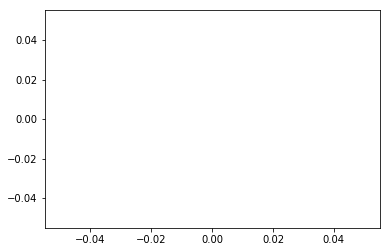

In [10]:

def prediction(time_step=2):
    X = tf.placeholder(tf.float32, shape=[None, time_step, input_size])
    # Y=tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    mean, std, test_x, test_y = get_test_data(time_step)
    with tf.variable_scope("sec_lstm", reuse=True):
        pred, _ = lstm(X)
    saver = tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        
        module_file = tf.train.latest_checkpoint('.')
        saver.restore(sess, module_file)
        test_predict = []
        for step in range(len(test_x) - 1):
            prob = sess.run(pred, feed_dict={X: [test_x[step]]})
            predict = prob.reshape((-1))
            test_predict.extend(predict)

        test_y = np.array(test_y) * std[0] + mean[0]
        test_predict = np.array(test_predict) * std[0] + mean[0]
        acc = np.average(np.abs(test_predict - test_y[:len(test_predict)]) / test_y[:len(test_predict)])  # 偏差
       
        #print(test_predict)
        #print(data)
        #format_output.format_output(test_predict,data)


       #file_object=open('G:\data_out.txt','w')                 
        #for i in test_predict:
            #file_object.write(str(i))
            #file_object.write('\n')
        #file_object.close()



        plt.figure()
        plt.plot(list(range(len(test_predict))), test_predict, color='b')
        plt.plot(list(range(len(test_y))), test_y, color='r')
        plt.show()



prediction()